In [1]:
#Binary Classification with Transfer Learning with python

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

In [4]:
#Upload dataset
train_data_dir =r'D:\DL_Fundamentals_Resources\cats_or_dogs\train'
test_data_dir  =r'D:\DL_Fundamentals_Resources\cats_or_dogs\test'

In [5]:
#Create data generator
datagen = ImageDataGenerator(rescale=1.0/225.0)

In [6]:
#Prepare iterators
train_it = datagen.flow_from_directory(train_data_dir,
                                       class_mode='binary',
                                       batch_size=32,
                                       target_size=(200,200))
test_it = datagen.flow_from_directory(test_data_dir,
                                       class_mode='binary',
                                       batch_size=32,
                                       target_size=(200,200))


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# Load VGG16 model
vgg_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(200, 200, 3))

# Show model summary
vgg_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 33s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Stack fully connected layers on the base model
vgg_model = models.Sequential()
vgg_model.add(vgg_base)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(256,
activation='relu'))
vgg_model.add(layers.Dense(1,
activation='sigmoid'))

vgg_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,433,793 (74.13 MB)

 Trainable params: 19,433,793 (74.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Setting: Freeze VGG16 and Train added fully connected layers
vgg_base.trainable = False

# Compile the model
vgg_model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['acc'])

# Train the model
vgg_history = vgg_model.fit(train_it,
steps_per_epoch=len(train_it),
validation_data=test_it,
validation_steps=len(test_it),
epochs=20, verbose=1)

d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - acc: 0.6963 - loss: 1.9595 - val_acc: 0.8740 - val_loss: 0.2845
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - acc: 0.8570 - loss: 0.3370 - val_acc: 0.9070 - val_loss: 0.2165
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 600s 6s/step - acc: 0.9199 - loss: 0.1808 - val_acc: 0.8310 - val_loss: 0.4515
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - acc: 0.9202 - loss: 0.1997 - val_acc: 0.9270 - val_loss: 0.1653
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 665s 7s/step - acc: 0.9550 - loss: 0.1149 - val_acc: 0.9230 - val_loss: 0.1836
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - acc: 0.9730 - loss: 0.0804 - val_acc: 0.7780 - val_loss: 0.6027
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - acc: 0.9719 - loss: 0.0786 - val_acc: 0.9150 - val_loss: 0.2130
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - acc: 0.9735 - loss: 0.0610 - val_acc: 0.9200 - val_loss: 0.2066
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 479s 5s/step - acc: 0.9907

In [13]:
# Evaluate model
loss, acc = vgg_model.evaluate(test_it, steps=len(test_it), verbose=0)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {acc:.3f}")

Test Loss: 0.270
Test Accuracy: 0.927


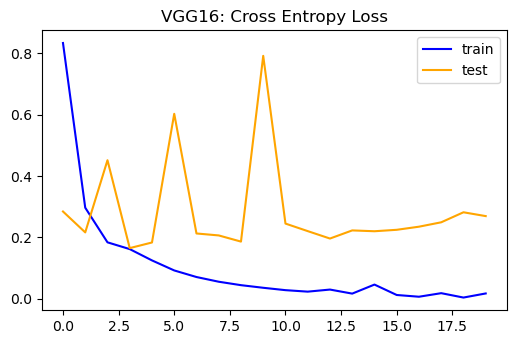

In [15]:
# Plot training history
plt.figure(figsize=(6,8))
# Plot loss
plt.subplot(211)
plt.title('VGG16: Cross Entropy Loss')
plt.plot(vgg_history.history['loss'],
color='blue', label='train')
plt.plot(vgg_history.history['val_loss'],
color='orange', label='test')
plt.legend()


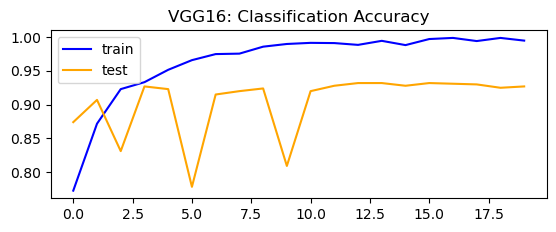

In [16]:
# Plot accuracy
plt.subplot(212)
plt.title('VGG16: Classification Accuracy')
plt.plot(vgg_history.history['acc'], color='blue',
label='train')
plt.plot(vgg_history.history['val_acc'], color='orange',
label='test')
plt.legend()